In [1]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("diabetes.csv")

In [4]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.60,0.63,50,1
1,1,85,66,29,0,26.60,0.35,31,0
2,8,183,64,0,0,23.30,0.67,32,1
3,1,89,66,23,94,28.10,0.17,21,0
4,0,137,40,35,168,43.10,2.29,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.90,0.17,63,0
764,2,122,70,27,0,36.80,0.34,27,0
765,5,121,72,23,112,26.20,0.24,30,0
766,1,126,60,0,0,30.10,0.35,47,1


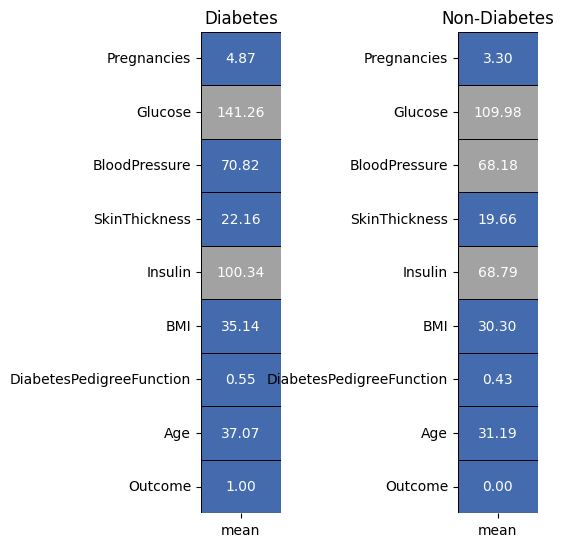

In [5]:
colors = ['#446BAD','#A2A2A2']

diabetes = data[data['Outcome'] == 1].describe().T
non_diabetes = data[data['Outcome'] == 0].describe().T

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))
plt.subplot(1,2,1)
sns.heatmap(diabetes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Diabetes');

plt.subplot(1,2,2)
sns.heatmap(non_diabetes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Non-Diabetes');

fig.tight_layout(pad = -1)

In [6]:
# categorial = data[data.columns[:-1]]
# numerical = data[data.columns[(len(data.columns)-1):(len(data.columns))]]
#or
X = data.drop('Outcome', axis=1)
y = data['Outcome']
# both are same

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize features (scaling the data for outliners)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Logistic Regression

In [9]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Create a pipeline with preprocessing (scaling) and logistic regression classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
])

# Define hyperparameters to tune
param_grid = {
    'clf__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'clf__solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'clf__max_iter': [100, 200, 300]  # Maximum number of iterations
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from GridSearchCV
best_clf = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Best Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Best Model Parameters: {'clf__C': 10, 'clf__max_iter': 100, 'clf__solver': 'liblinear'}
Best Model Accuracy: 0.7532
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



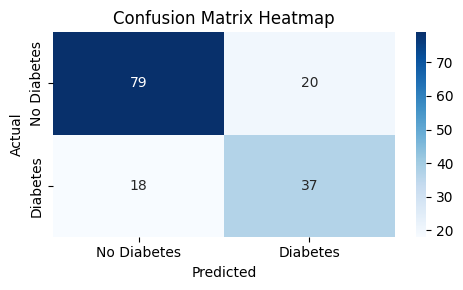

In [10]:
y_pred = best_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### ROC

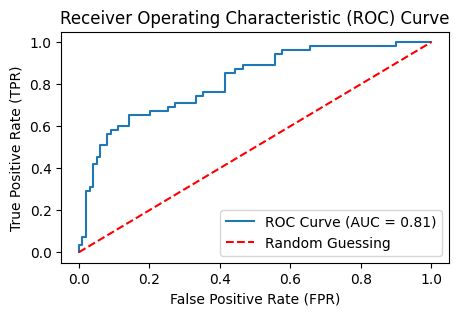

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming 'best_clf' contains the best classifier from GridSearchCV
# 'X_test' and 'y_test' are the test features and target variables
y_scores = best_clf.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
# plt.grid(True)
plt.show()

### Random Forest Regression

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
# Create a pipeline with preprocessing (scaling) and classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
])

# Define hyperparameters to tune
param_grid = {
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from GridSearchCV
best_clf = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Best Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Best Model Parameters: {'clf__max_depth': 20, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
Best Model Accuracy: 0.7532
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



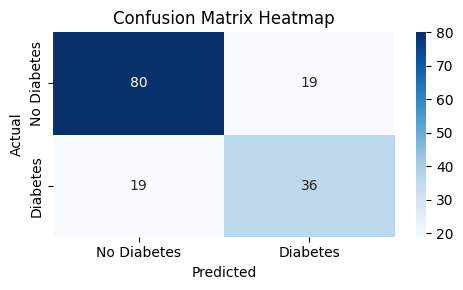

In [13]:
# Assuming 'best_clf' contains the best classifier from GridSearchCV
y_pred = best_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### ROC Curve:

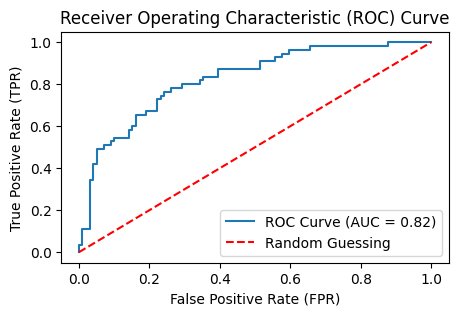

In [14]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming 'best_clf' contains the best classifier from GridSearchCV
# 'X_test' and 'y_test' are the test features and target variables
y_scores = best_clf.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
# plt.grid(True)
plt.show()


### Decision Tree

In [15]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline with preprocessing (scaling) and decision tree classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', DecisionTreeClassifier())
])

# Define hyperparameters to tune
param_grid = {
    'clf__criterion': ['gini', 'entropy'],  # Split criterion
    'clf__max_depth': [None, 10, 20],  # Maximum depth of the tree
    'clf__min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'clf__min_samples_leaf': [1, 2, 4]  # Minimum samples required at each leaf node
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from GridSearchCV
best_clf = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Best Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Best Model Parameters: {'clf__criterion': 'gini', 'clf__max_depth': None, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2}
Best Model Accuracy: 0.7597
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



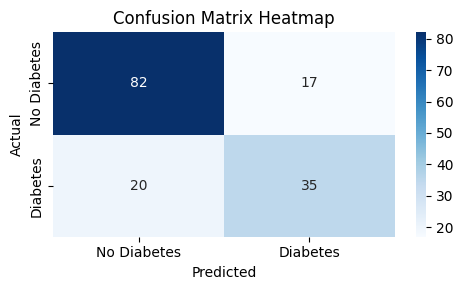

In [16]:
# Assuming 'best_clf' contains the best classifier from GridSearchCV
y_pred = best_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### ROC

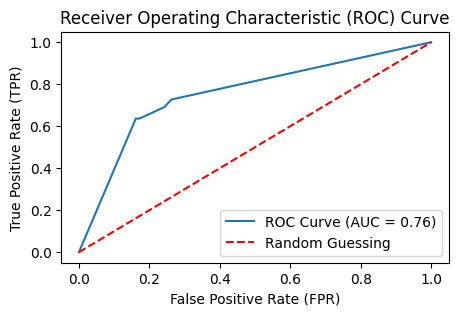

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming 'best_clf' contains the best classifier from GridSearchCV
# 'X_test' and 'y_test' are the test features and target variables
y_scores = best_clf.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
# plt.grid(True)
plt.show()

### Gradient Boosting Classifier

In [18]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline with preprocessing (scaling) and gradient boosting classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', GradientBoostingClassifier())
])

# Define hyperparameters to tune
param_grid = {
    'clf__n_estimators': [100, 200, 300],  # Number of boosting stages
    'clf__learning_rate': [0.01, 0.1, 0.5],  # Learning rate shrinks the contribution of each tree
    'clf__max_depth': [3, 5, 7],  # Maximum depth of the individual estimators
    'clf__min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'clf__min_samples_leaf': [1, 2, 4]  # Minimum samples required at each leaf node
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from GridSearchCV
best_clf = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Best Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Best Model Parameters: {'clf__learning_rate': 0.01, 'clf__max_depth': 3, 'clf__min_samples_leaf': 4, 'clf__min_samples_split': 10, 'clf__n_estimators': 300}
Best Model Accuracy: 0.7597
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



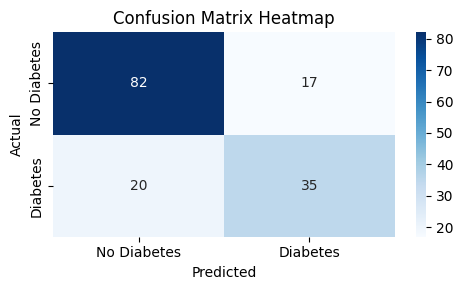

In [19]:
# Assuming 'best_clf' contains the best classifier from GridSearchCV
y_pred = best_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### ROC

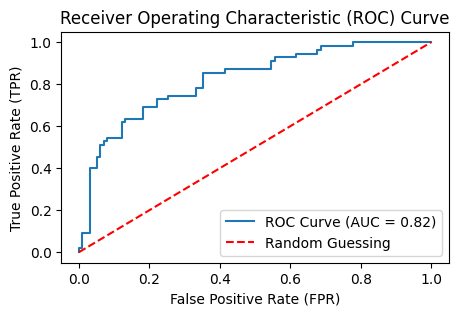

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming 'best_clf' contains the best classifier from GridSearchCV
# 'X_test' and 'y_test' are the test features and target variables
y_scores = best_clf.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
# plt.grid(True)
plt.show()

### SVM (Support Vector Machine)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline with preprocessing (scaling) and SVM classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC(probability=True))
])

# Define hyperparameters to tune
param_grid = {
    'clf__C': [0.1, 1, 10, 100],  # Regularization parameter
    'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'clf__gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', 'sigmoid' kernels
    'clf__degree': [2, 3, 4],  # Degree of the 'poly' kernel
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from GridSearchCV
best_clf = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Best Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Best Model Parameters: {'clf__C': 1, 'clf__degree': 2, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Best Model Accuracy: 0.7338
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



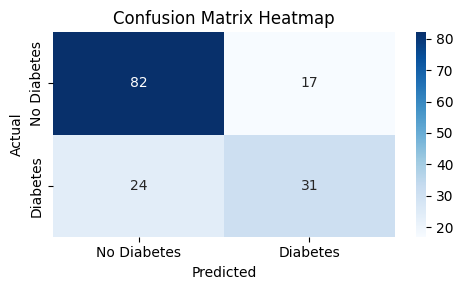

In [22]:
# Assuming 'best_clf' contains the best classifier from GridSearchCV
y_pred = best_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### ROC

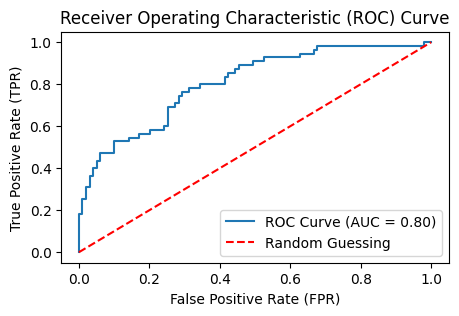

In [23]:
decision_scores = best_clf.decision_function(X_test)

# Calculate FPR, TPR, and thresholds for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, decision_scores)

# Plot ROC curve using decision scores
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### K-Nearest Neighbour

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline with preprocessing (scaling) and KNN classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', KNeighborsClassifier())
])

# Define hyperparameters to tune
param_grid = {
    'clf__n_neighbors': [3, 5, 7, 9],  # Number of neighbors
    'clf__weights': ['uniform', 'distance'],  # Weight function used in prediction
    'clf__metric': ['euclidean', 'manhattan']  # Distance metric for the tree
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from GridSearchCV
best_clf = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Best Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

Best Model Parameters: {'clf__metric': 'euclidean', 'clf__n_neighbors': 5, 'clf__weights': 'uniform'}
Best Model Accuracy: 0.6948
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.58      0.51      0.54        55

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.66       154
weighted avg       0.69      0.69      0.69       154



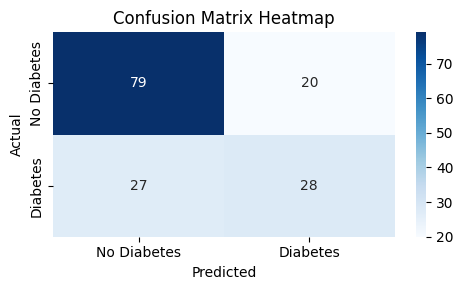

In [25]:
# Assuming 'best_clf' contains the best classifier from GridSearchCV
y_pred = best_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### ROC

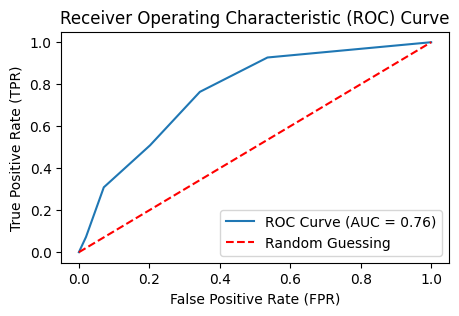

In [26]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming 'best_clf' contains the best classifier from GridSearchCV
# 'X_test' and 'y_test' are the test features and target variables
y_scores = best_clf.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
# plt.grid(True)
plt.show()

### Neural Network

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline with preprocessing (scaling) and Neural Network classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier())
])

# Define hyperparameters to tune
param_grid = {
    'clf__hidden_layer_sizes': [(100,), (50, 100, 50), (50,)],  # Size of hidden layers
    'clf__activation': ['relu', 'tanh'],  # Activation function
    'clf__solver': ['adam', 'sgd'],  # Solver for weight optimization
    'clf__alpha': [0.0001, 0.001, 0.01],  # Regularization parameter
    'clf__max_iter': [200, 300, 400]  # Maximum number of iterations
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from GridSearchCV
best_clf = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Best Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)

/Users/navyasri/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/navyasri/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/navyasri/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/navyasri/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/navyasri/anaconda

Best Model Parameters: {'clf__activation': 'tanh', 'clf__alpha': 0.001, 'clf__hidden_layer_sizes': (50,), 'clf__max_iter': 300, 'clf__solver': 'adam'}
Best Model Accuracy: 0.7597
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.82        99
           1       0.67      0.64      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.74       154
weighted avg       0.76      0.76      0.76       154



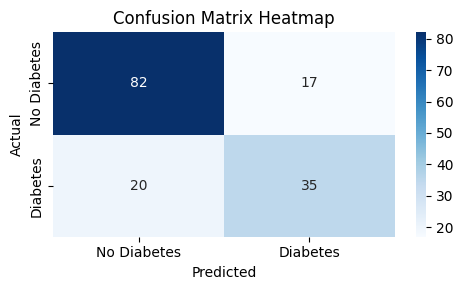

In [28]:
# Assuming 'best_clf' contains the best classifier from GridSearchCV
y_pred = best_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### ROC

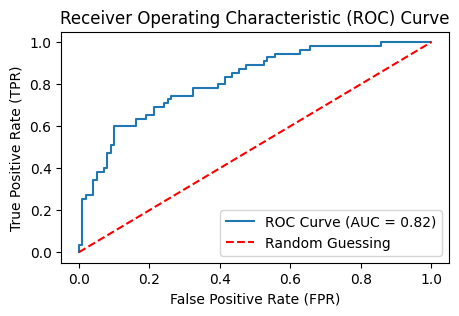

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming 'best_clf' contains the best classifier from GridSearchCV
# 'X_test' and 'y_test' are the test features and target variables
y_scores = best_clf.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
# plt.grid(True)
plt.show()

### Naive Bayes

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

# Create a pipeline with preprocessing (scaling) and Naive Bayes classifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', GaussianNB())
])

# Define hyperparameters to tune
param_grid = {
    'clf__var_smoothing': [1e-9, 1e-8, 1e-7]  # Smoothing parameter for GaussianNB
}

# Initialize GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from GridSearchCV
best_clf = grid_search.best_estimator_

# Predict using the best estimator
y_pred = best_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print results
print(f"Best Model Parameters: {grid_search.best_params_}")
print(f"Best Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(report)


Best Model Parameters: {'clf__var_smoothing': 1e-09}
Best Model Accuracy: 0.7662
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



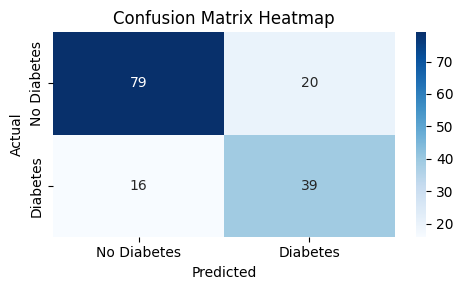

In [31]:
# Assuming 'best_clf' contains the best classifier from GridSearchCV
y_pred = best_clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

### ROC

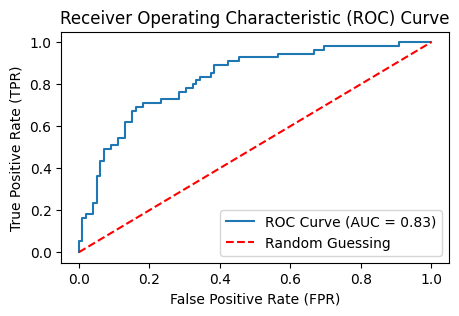

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

# Assuming 'best_clf' contains the best classifier from GridSearchCV
# 'X_test' and 'y_test' are the test features and target variables
y_scores = best_clf.predict_proba(X_test)[:, 1]  # Probability estimates of the positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Calculate AUC (Area Under the Curve)
auc = roc_auc_score(y_test, y_scores)

# Plot ROC curve
plt.figure(figsize=(5, 3))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
# plt.grid(True)
plt.show()

In [33]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [35]:
pip install flask


Note: you may need to restart the kernel to use updated packages.
